In [1]:
import pandas as pd
import numpy as np

In [2]:
remote = pd.read_csv(r"C:\Users\gopik\OneDrive\Desktop\FINAL PROJECT\Remote_Work\remote_work.csv")

In [3]:
#Initial data check:
remote.info()
remote.shape
remote.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1500 non-null   int64  
 1   Work_Mode              1500 non-null   object 
 2   Hours_Worked_Per_Week  1500 non-null   object 
 3   Productivity_Score     1395 non-null   float64
 4   Well_Being_Score       1441 non-null   float64
 5   Department             1500 non-null   object 
 6   Team                   1320 non-null   object 
 7   Join_Year              1350 non-null   float64
 8   Overtime_Flag          1500 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 95.3+ KB


,Employee_ID,Work_Mode,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score,Department,Team,Join_Year,Overtime_Flag
0,1,Remote,23,94.0,68.0,Finance,C,2016.0,False
1,2,In-Office,33,81.0,90.0,HR,D,2019.0,False
2,3,Onsite,55,77.0,73.0,Sales,D,2020.0,False
3,4,Hybrid,47,80.0,74.0,Operations,A,2022.0,True
4,5,WFH,39,75.0,73.0,hr,C,2022.0,False


In [4]:
#Standardize column names
remote.columns = remote.columns.str.strip().str.lower().str.replace(' ','_')

In [5]:
#Clean categorical text columns
categorical_cols = ['department', 'work_mode', 'team']
for col in categorical_cols:
    remote[col]= remote[col].astype(str).str.strip().str.lower().str.title()

In [6]:
#Validating categorical values

remote['work_mode'].unique()
remote['department'].unique()

array(['Finance', 'Hr', 'Sales', 'Operations', 'It'], dtype=object)

In [7]:
#Convert numeric columns stored as text
remote['hours_worked_per_week'] = pd.to_numeric(remote['hours_worked_per_week'], errors='coerce')

In [8]:
#Fix incorrect data types
remote['join_year'] = remote['join_year'].astype('Int64')

In [9]:
remote['work_mode'].unique()


array(['Remote', 'In-Office', 'Onsite', 'Hybrid', 'Wfh', 'Office',
       'Work From Home'], dtype=object)

In [10]:
#Handling diff values in work_mode 
work_mode_map = {
    'Wfh': 'Remote',
    'Work From Home': 'Remote',
    'Remote': 'Remote',

    'Onsite': 'In-Office',
    'Office': 'In-Office',
    'In-Office': 'In-Office',

    'Hybrid': 'Hybrid'
}

remote['work_mode'] = remote['work_mode'].map(work_mode_map)

In [11]:
remote['work_mode'].unique()


array(['Remote', 'In-Office', 'Hybrid'], dtype=object)

In [12]:
#Handling diff values in department
department_map = {
    'Finance': 'Finance',
    'Hr': 'HR', 
    'Sales': 'Sales',
    'Operations': 'Operations',
    'It': 'IT'}

remote['department'] = remote['department'].map(department_map)

In [13]:
remote['department'].unique()


array(['Finance', 'HR', 'Sales', 'Operations', 'IT'], dtype=object)

In [14]:
#Handling Missing Values:
remote.isna().sum()

employee_id                0
work_mode                  0
hours_worked_per_week    120
productivity_score       105
well_being_score          59
department                 0
team                       0
join_year                150
overtime_flag              0
dtype: int64

In [15]:
#Handling missing values:

remote['hours_worked_per_week'].fillna(remote['hours_worked_per_week'].median(), inplace=True)

remote['productivity_score'].fillna(remote['productivity_score'].median(), inplace=True)

remote['well_being_score'].fillna(remote['well_being_score'].median(), inplace=True)

remote['join_year'].fillna(remote['join_year'].median(), inplace=True)

C:\Users\gopik\AppData\Local\Temp\ipykernel_14352\1694318383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  remote['hours_worked_per_week'].fillna(remote['hours_worked_per_week'].median(), inplace=True)
C:\Users\gopik\AppData\Local\Temp\ipykernel_14352\1694318383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [16]:
remote.isna().sum()

employee_id              0
work_mode                0
hours_worked_per_week    0
productivity_score       0
well_being_score         0
department               0
team                     0
join_year                0
overtime_flag            0
dtype: int64

In [17]:
#Feature Engineering:
#Employee Tenure
current_year = 2026

remote['tenure_years'] = current_year - remote['join_year']

In [18]:
#Tenure Buckets
remote['tenure_group'] = pd.cut(remote['tenure_years'], bins=[0, 2, 5, 10, 50], labels=['0–2 yrs', '3–5 yrs', '6–10 yrs', '10+ yrs'])

In [19]:
#Workload classification:
remote['workload_level'] = pd.cut(remote['hours_worked_per_week'], bins=[0, 35, 45, 100], labels=['Light', 'Normal', 'Heavy'])

In [20]:
#High Productivity flag:
remote['high_productivity'] = remote['productivity_score'] >= 75


In [21]:
#Well-Being Risk Indicator

remote['well_being_risk'] = remote['well_being_score'] < 50

In [22]:
remote[['tenure_years', 'tenure_group',
    'workload_level', 'high_productivity',
    'well_being_risk']].head()

,tenure_years,tenure_group,workload_level,high_productivity,well_being_risk
0,10,6–10 yrs,Light,True,False
1,7,6–10 yrs,Light,True,False
2,6,6–10 yrs,Heavy,True,False
3,4,3–5 yrs,Heavy,True,False
4,4,3–5 yrs,Normal,True,False


In [28]:
#EDA:
#Productivity vs Work Mode
#Does work mode affect productivity?
productivity_by_work_mode = remote.groupby('work_mode')['productivity_score'].mean().reset_index()
productivity_by_work_mode

,work_mode,productivity_score
0,Hybrid,73.334842
1,In-Office,72.278396
2,Remote,75.939245


In [26]:
import matplotlib.pyplot as plt


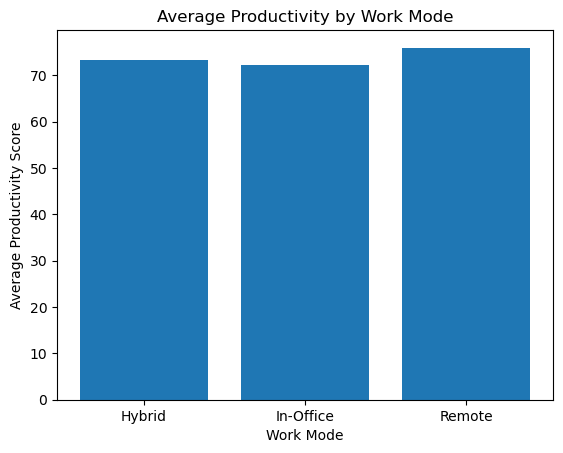

In [27]:
plt.figure()
plt.bar(productivity_by_work_mode['work_mode'], productivity_by_work_mode['productivity_score'])
plt.xlabel('Work Mode')
plt.ylabel('Average Productivity Score')
plt.title('Average Productivity by Work Mode')
plt.show()

In [ ]:
#The analysis shows that remote employees have the highest average productivity score (75.94), followed by hybrid (73.33) 
#and in-office employees (72.28). This indicates that remote work arrangements may support higher productivity levels, 
#potentially due to increased flexibility and reduced commuting stress.

In [29]:
#Well-Being vs Work Mode
#Does work mode impact well-being?

well_being_by_mode = (remote.groupby('work_mode')['well_being_score'].mean().reset_index())
well_being_by_mode

,work_mode,well_being_score
0,Hybrid,72.176471
1,In-Office,68.253898
2,Remote,77.640394


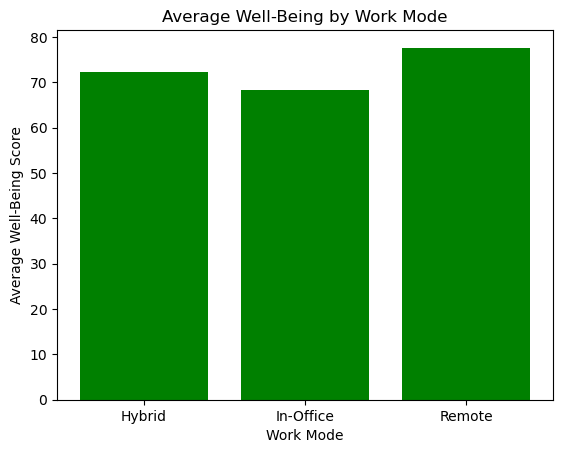

In [30]:
plt.figure()
plt.bar(well_being_by_mode['work_mode'], well_being_by_mode['well_being_score'], color='green')
plt.xlabel('Work Mode')
plt.ylabel('Average Well-Being Score')
plt.title('Average Well-Being by Work Mode')
plt.show()

In [ ]:
#The analysis indicates that remote employees exhibit the highest average well-being score (77.64), followed by hybrid (72.18) 
#and in-office employees (68.25). The substantial gap between remote and in-office employees suggests that flexible work 
#arrangements may contribute positively to employee well-being.

In [31]:
#Workload Level vs Productivity
#Does workload influence productivity?
productivity_by_workload = (remote.groupby('workload_level')['productivity_score'].mean().reset_index())
productivity_by_workload 

C:\Users\gopik\AppData\Local\Temp\ipykernel_14352\1839550993.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productivity_by_workload = (remote.groupby('workload_level')['productivity_score'].mean().reset_index())


,workload_level,productivity_score
0,Light,75.275735
1,Normal,74.076923
2,Heavy,73.159664


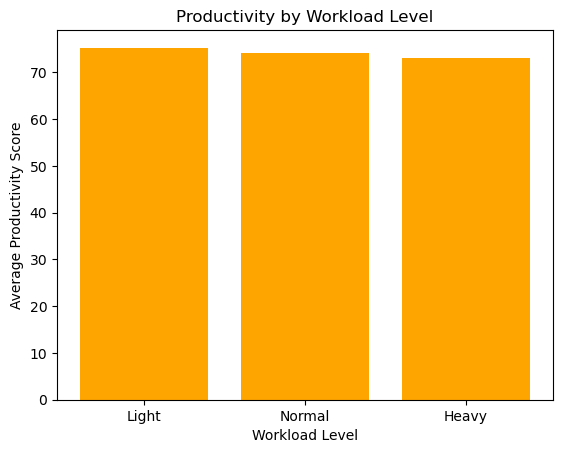

In [32]:
plt.figure()
plt.bar(productivity_by_workload['workload_level'], productivity_by_workload['productivity_score'], color ='orange')
plt.xlabel('Workload Level')
plt.ylabel('Average Productivity Score')
plt.title('Productivity by Workload Level')
plt.show()

In [ ]:
#The analysis shows a gradual decline in productivity as workload increases. Employees with light workloads demonstrate 
#the highest average productivity (75.28), while those with heavy workloads show the lowest (73.16), indicating diminishing 
#returns from excessive working hours.

In [ ]:
# Workload Level vs Well-Being (Burnout signal)
#Does workload affect well-being?


In [33]:
well_being_by_workload = (remote.groupby('workload_level')['well_being_score'].mean().reset_index())

well_being_by_workload


C:\Users\gopik\AppData\Local\Temp\ipykernel_14352\1754412444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  well_being_by_workload = (remote.groupby('workload_level')['well_being_score'].mean().reset_index())


,workload_level,well_being_score
0,Light,75.625000
1,Normal,73.497130
2,Heavy,70.714286


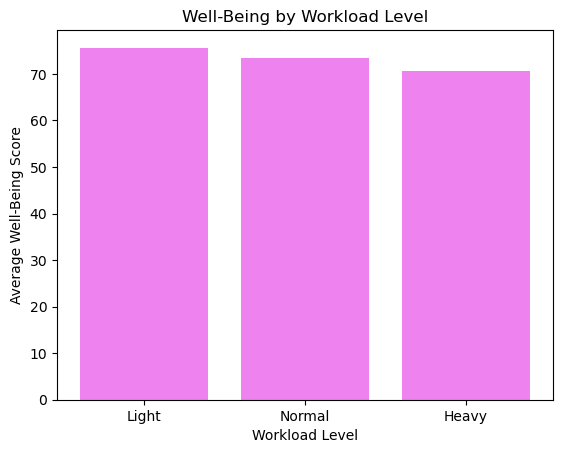

In [34]:
plt.figure()
plt.bar(well_being_by_workload['workload_level'], well_being_by_workload['well_being_score'], color ='Violet')
plt.xlabel('Workload Level')
plt.ylabel('Average Well-Being Score')
plt.title('Well-Being by Workload Level')
plt.show()

In [ ]:
#The analysis reveals a clear negative relationship between workload and employee well-being. 
#Employees with light workloads show the highest well-being scores (75.63), while those with heavy workloads exhibit significantly 
#lower well-being (70.71), highlighting the potential burnout risks associated with excessive working hours.

In [35]:
#Exporting the cleaned csv file
remote.to_csv("remote_work_cleaned.csv", index=False)
